## Course Announcements

- End-of-Course Survey: http://bit.ly/COGS108_post_survey
    - By Wed 6/12 for Extra Credit (11:59 PM)
- Please fill out your CAPEs
    - Current: 38%
- A5 Due Sunday (11:59 PM)
- Final Project Due Wed 6/12 (11:59 PM)
    - PDF to Gradescope 
        - 1 per group
        - add all group members to submission
    - Extra Credit Opportunity: Pull Request (PR) to GitHub

# Dimensionality Reduction 

- General Overview
- Examples with data:
    - Iris Dataset
    - S&P 500

# Setup

In [2]:
import pandas as pd
pd.options.display.max_rows = 10

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 14})

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

Code here in intro example adapted from Jake VanderPlas' [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

### General Concepts

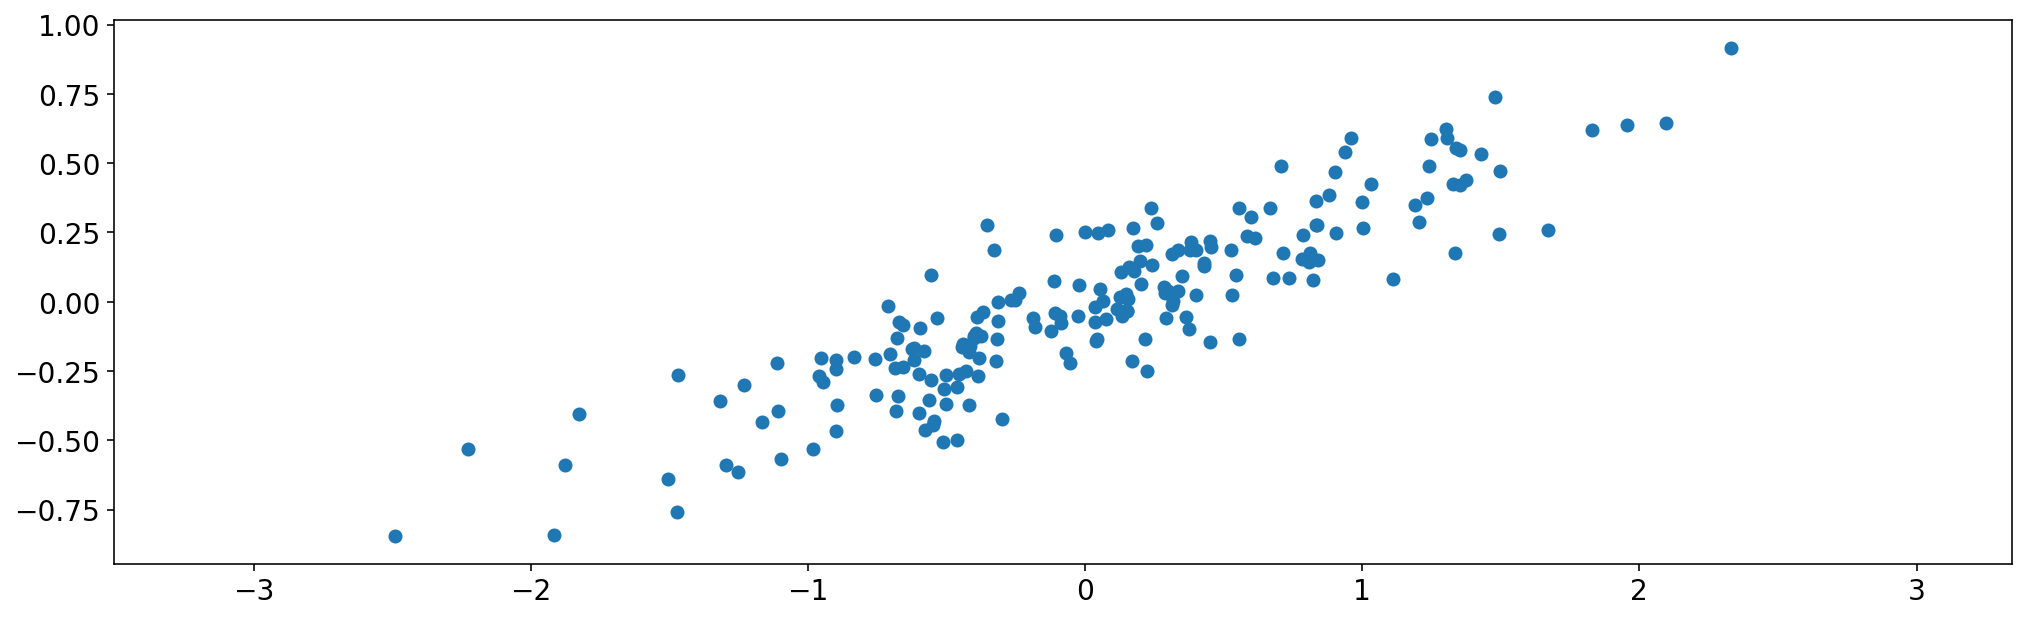

In [3]:
# generate data and look at relationhip
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

We can tell that there is a linear relationship between the two variables.

#### Carry Out PCA

In [4]:
# Use PCA from sklearn
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [5]:
# PCs
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
# Variance Explained
print(pca.explained_variance_)

[0.7625315 0.0184779]


#### Visualizing PCA

To see what these numbers mean, let's visualize them:
- as vectors over the input data
    - using the "components" to define the direction of the vector
    - and the "explained variance" to define the squared-length of the vector:

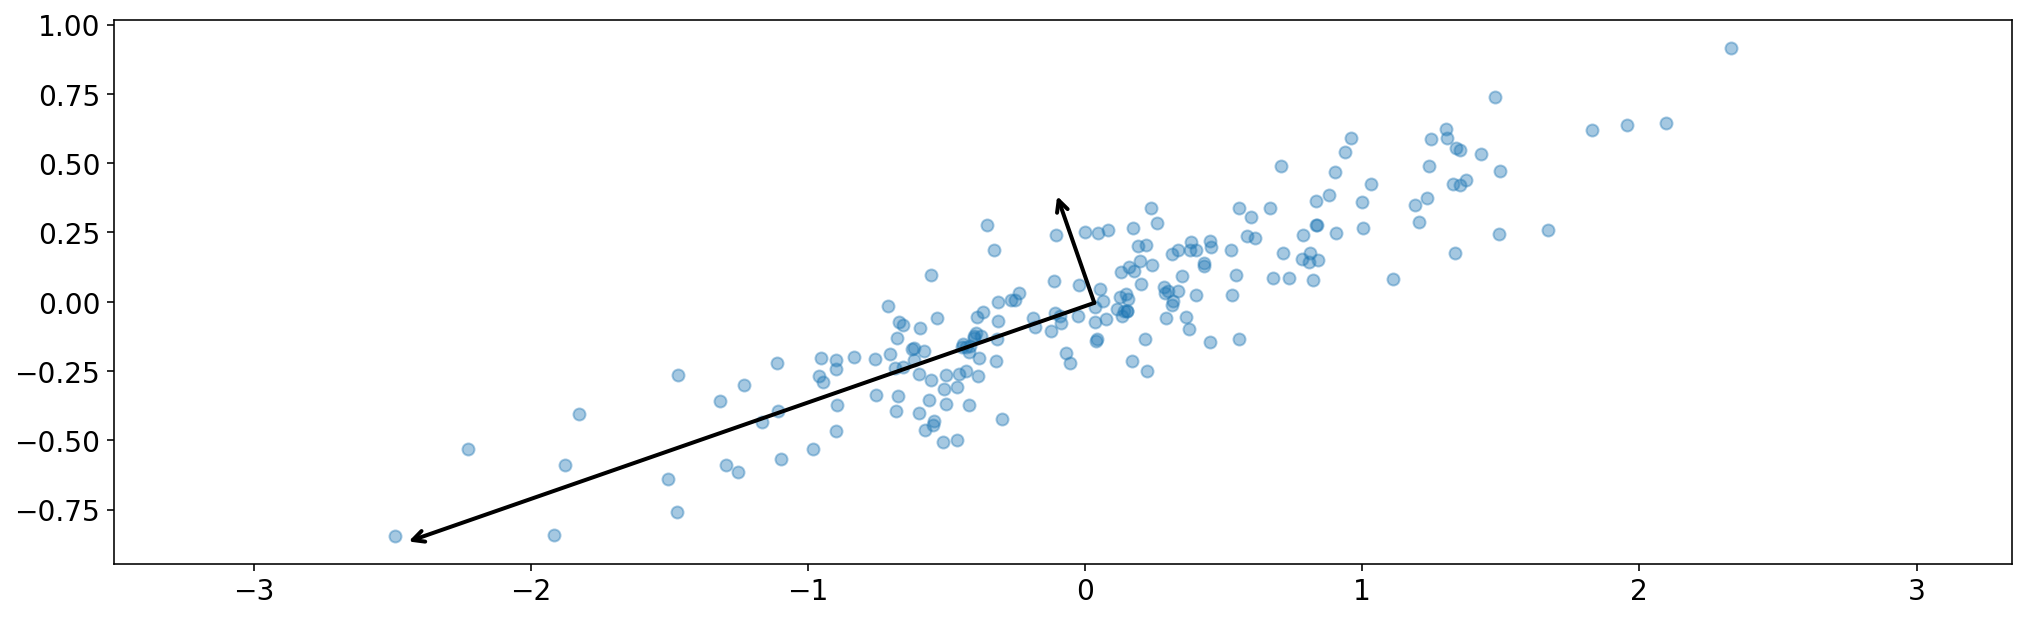

In [7]:
# generate draw_vector fucntion
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, 
                      shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

- Vectors represent the **principal axes** of the data
- length of the vector = an indication of how "important" that axis is in describing the distribution of the data—more precisely:
    - a measure of the variance of the data when projected onto that axis
    - The projection of each data point onto the principal axes are the "principal components" of the data.

# PCA: Iris Dataset

- Dataset
- PCA
- Visualize

This example comes from plotly, but has been reproduced in many places, as the iris dataset is quite famous: https://plot.ly/ipython-notebooks/principal-component-analysis/

### The Dataset

In [8]:
# read dataset in
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None)

# change column names and drop empty line
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df['species'] = df['class'].replace(to_replace = "Iris-", value = "", regex=True)

print(df.shape)

df

(150, 6)


,sepal_len,sepal_wid,petal_len,petal_wid,class,species
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


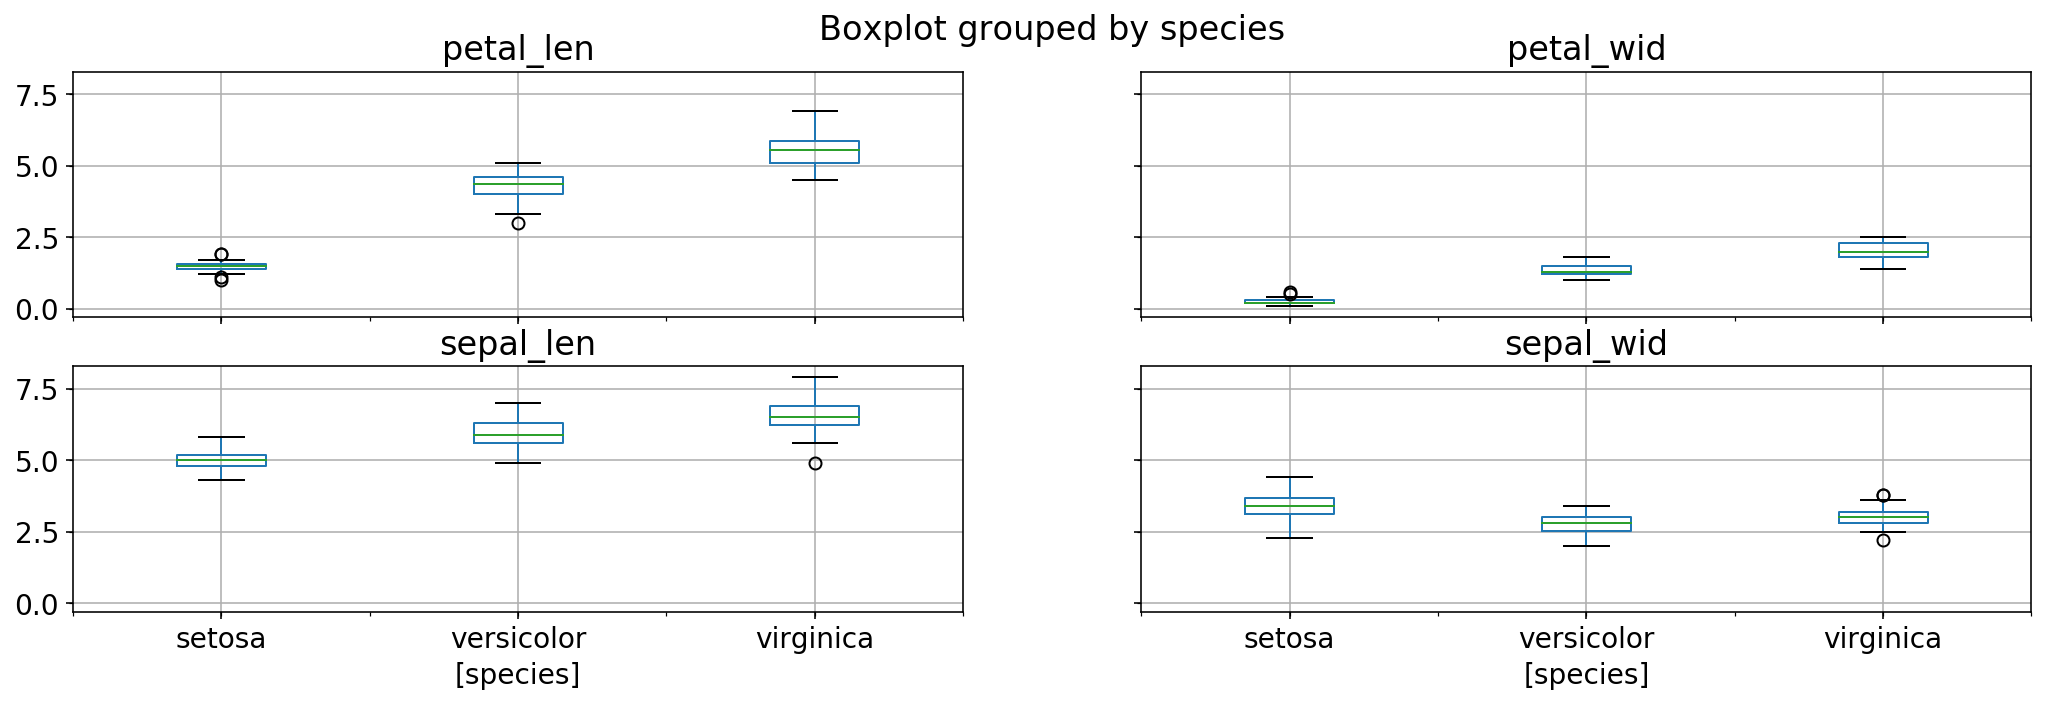

In [9]:
# boxplot across variables
df.boxplot(by='species');

- A) setosa and versicolor
- B) setosa and virginica
- C) versicolor and viginica
- D) all quite distinct
- E) all equally similar


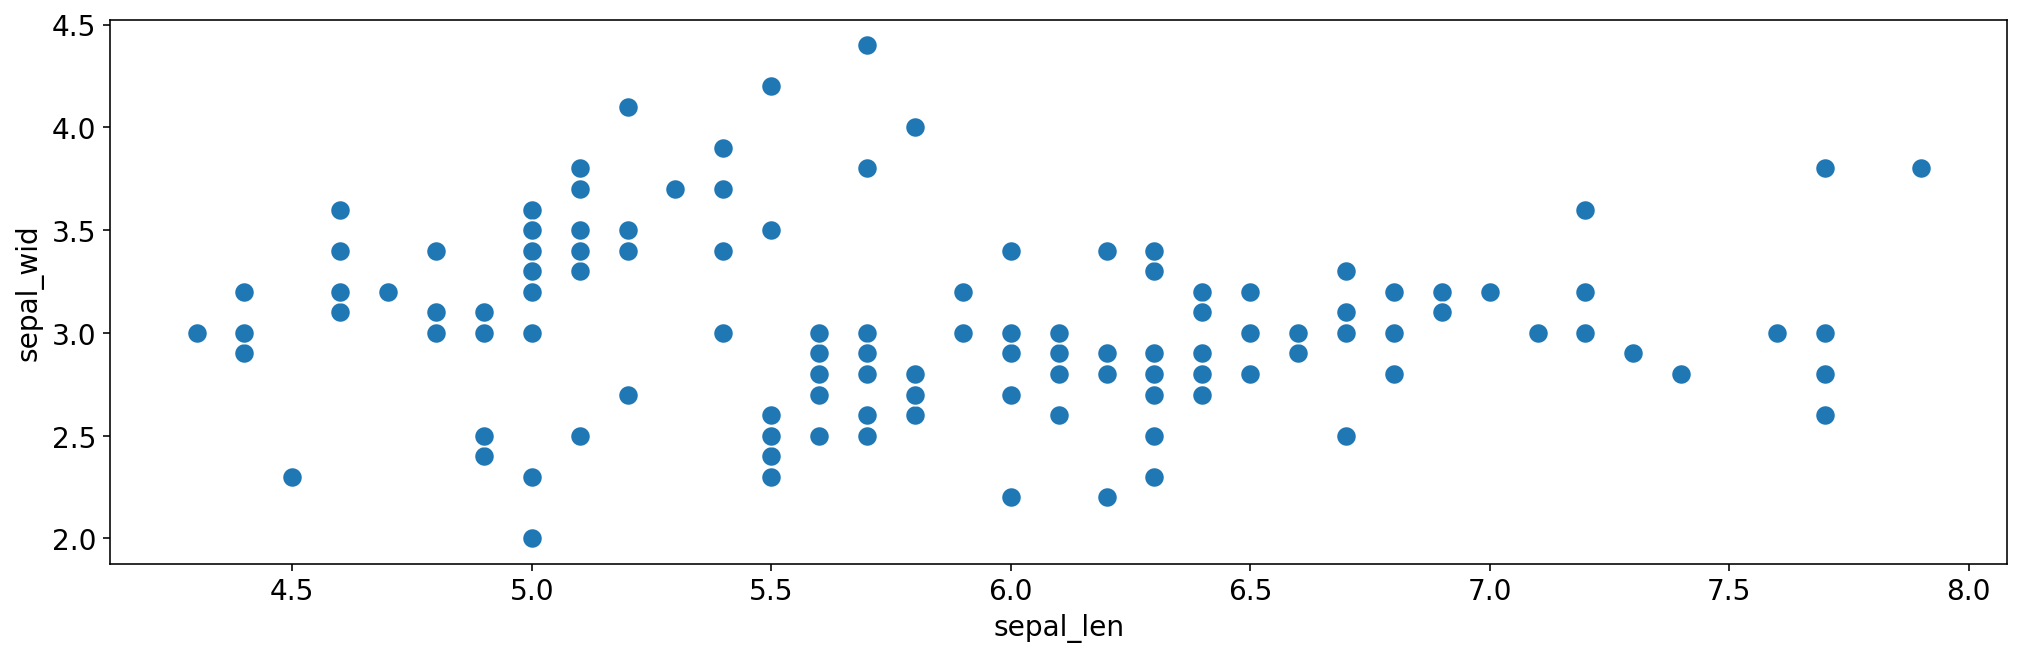

In [10]:
# plot two variables
sns.scatterplot(x = 'sepal_len', y ='sepal_wid', 
                s = 100, data = df);

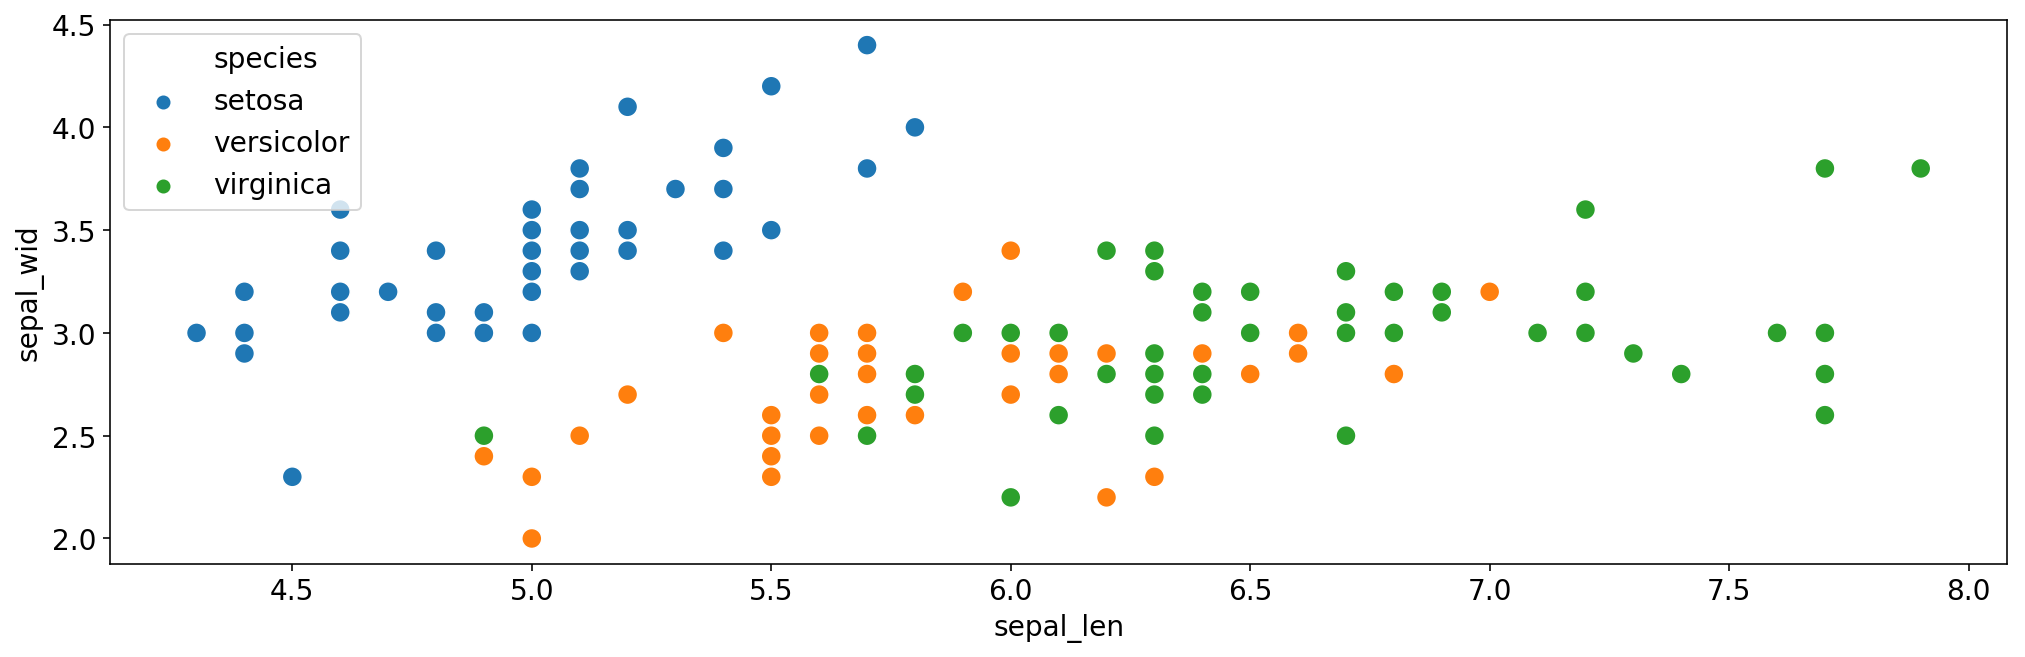

In [11]:
# color by species
sns.scatterplot(x = 'sepal_len', y ='sepal_wid', hue = 'species', 
                s = 100, data = df)
plt.legend(loc='upper left');


- A) setosa and versicolor
- B) setosa and virginica
- C) versicolor and viginica
- D) all quite distinct
- E) all equally similar


![iris](img/iris.png)

### PCA: Iris

- define predictors
- standardize data

In [12]:
# split data table into predictors and outcome (class labels - species)
iris_predictors = df.iloc[:,0:4].values
iris_species = df.iloc[:,4].values

#### Calculating PCs

There are many ways to calculate PCs. You can calculate the covariance matrix and run eigendecomposition on that. You can use `SVD` (singular variable decomposition) from `numpy`. But, the simplest way to calculate PCs is from `sklearn`, using `PCA` (as seen above).

In [13]:
# calculate PCs
pca = PCA(n_components=4)
iris_pca_fit = pca.fit(iris_predictors)
iris_PCs = pca.fit_transform(iris_predictors)

In [14]:
# See PCs
print(iris_pca_fit.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


# Selecting PCs

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top 𝑘 eigenvectors.

In [15]:
print(iris_pca_fit.explained_variance_)

[4.22484077 0.24224357 0.07852391 0.02368303]


In [16]:
print(iris_pca_fit.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]


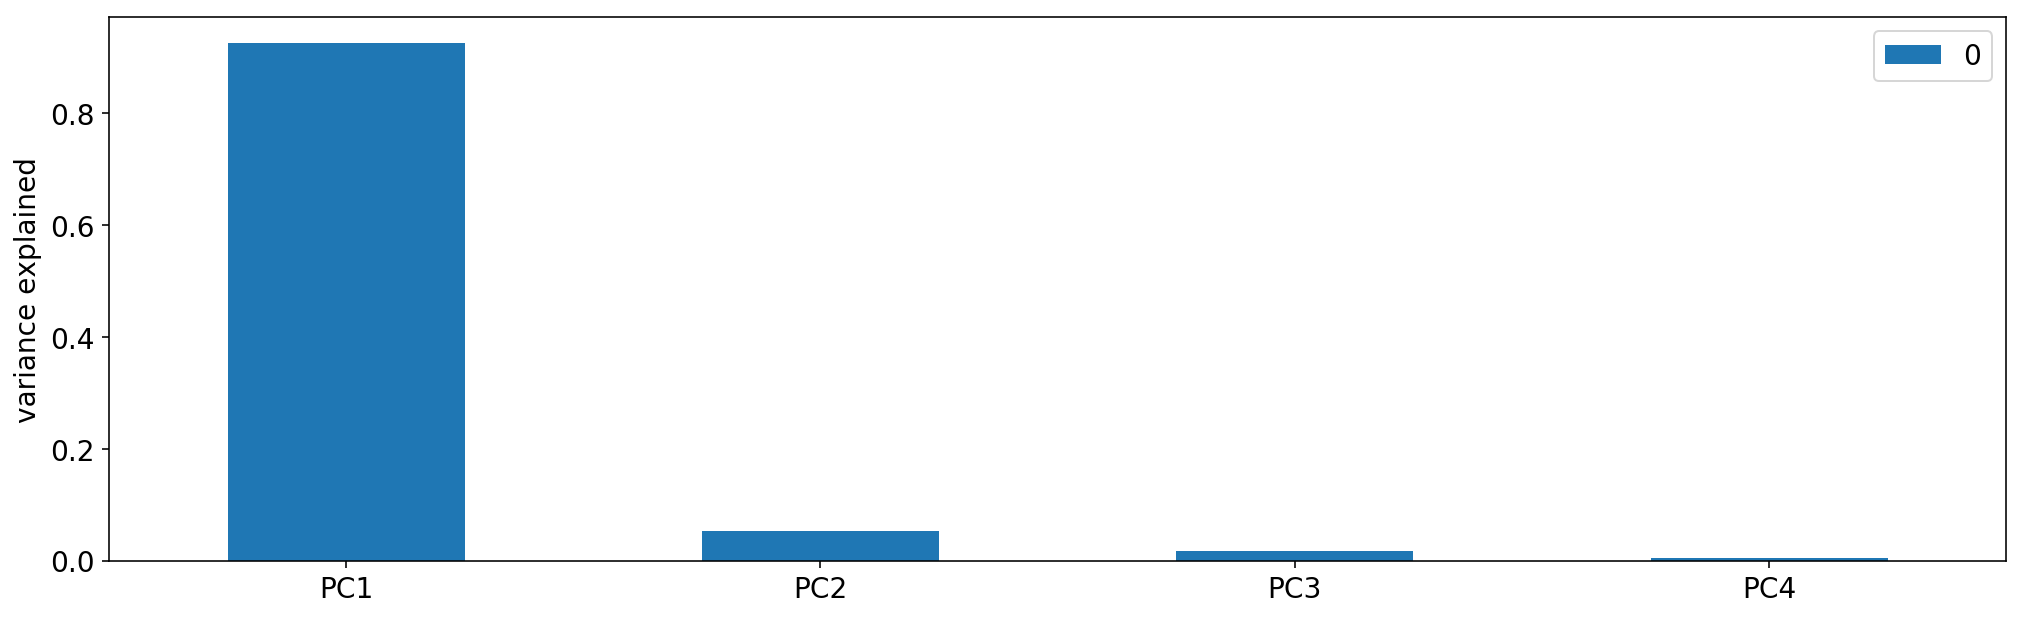

In [17]:
var_exp = pd.DataFrame(iris_pca_fit.explained_variance_ratio_,
                       ['PC1', 'PC2','PC3','PC4'])
var_exp.plot.bar(rot=0)
plt.ylabel('variance explained');

PC1 explains 92% of the variance.
PC2 contains important information (5% of the variance).

PCs 3 and 4 can safely be dropped without losing to much information. 

Together, the first two  PCs contain 97% of the information.



#### Visualization

In [18]:
# get dataframe with PCs and label
pca_out = pd.DataFrame(iris_PCs, 
                       columns=['PC1','PC2','PC3','PC4'])
pca_out['species'] = df['species']
pca_out

,PC1,PC2,PC3,PC4,species
0,-2.684207,0.326607,-0.021512,0.001006,setosa
1,-2.715391,-0.169557,-0.203521,0.099602,setosa
2,-2.889820,-0.137346,0.024709,0.019305,setosa
3,-2.746437,-0.311124,0.037672,-0.075955,setosa
4,-2.728593,0.333925,0.096230,-0.063129,setosa
...,...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082,virginica
146,1.525664,-0.375021,-0.120636,0.255723,virginica
147,1.764046,0.078519,0.130784,0.136295,virginica
148,1.901629,0.115877,0.722874,0.040873,virginica


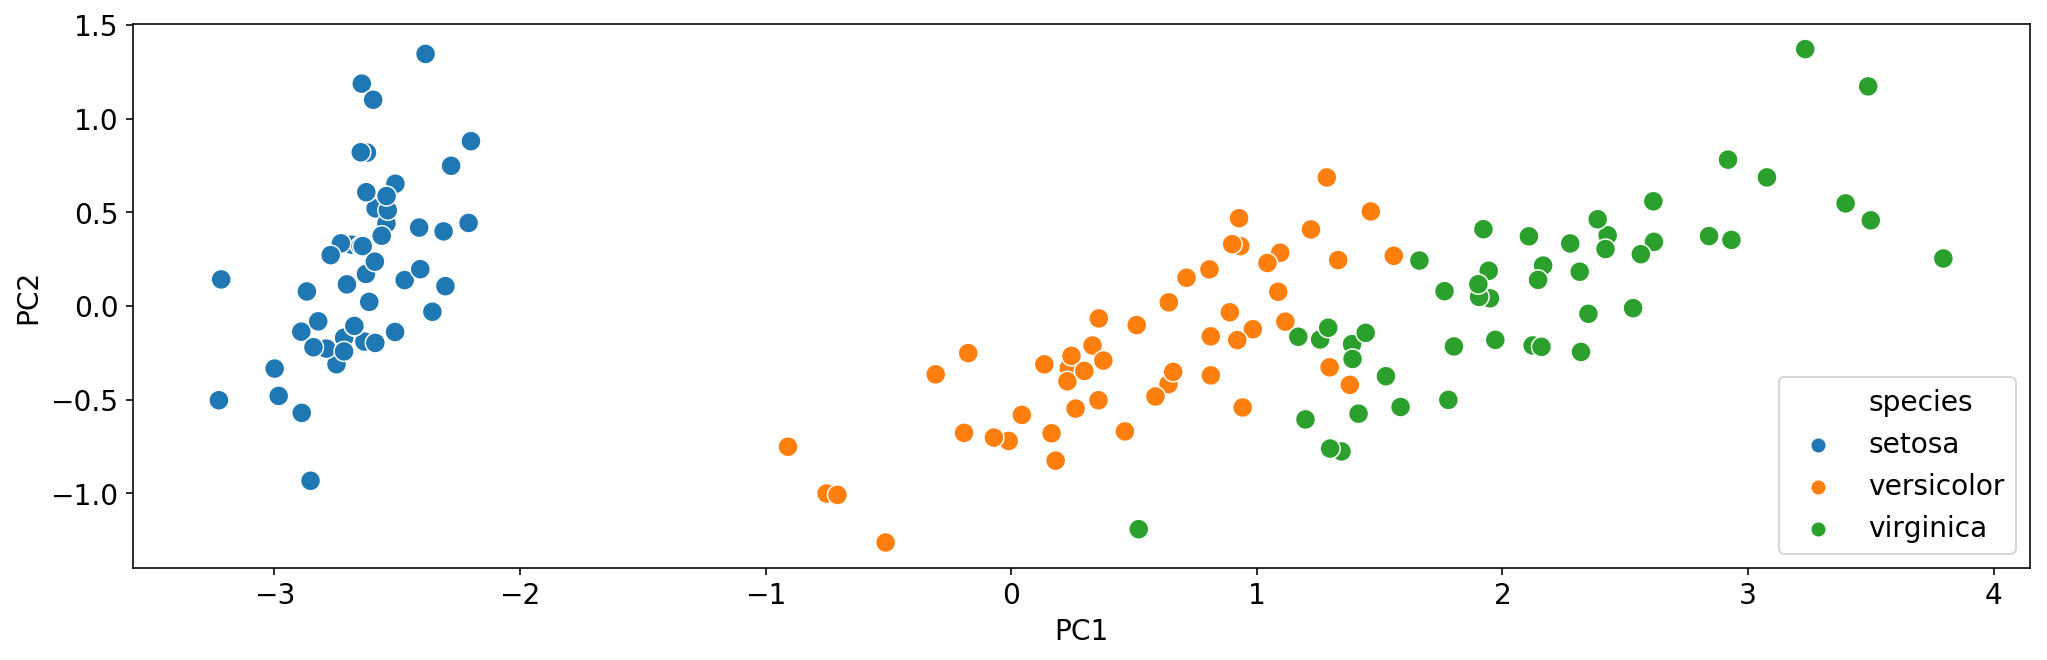

In [19]:
# plot PC1 and PC2
# color by species 
sns.scatterplot(x = 'PC1', y ='PC2', hue = 'species', 
                s = 100, data = pca_out);


- A) setosa and versicolor
- B) setosa and virginica
- C) versicolor and viginica
- D) all quite distinct
- E) all equally similar


### Iris: Summary

While we're only looking at 4 variables here and PCA can handle many more quantitative information, we quickly get a  understanding of the overall structure of the data across all four quantitative variables using PCA within the iris dataset.

## S&P 500 Example 

In [20]:
# read data in
sp = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/sp500_data.csv')
sp.shape

(5647, 518)

In [21]:
sp.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1/29/93,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,2/1/93,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,2/2/93,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,2/3/93,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,2/4/93,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


#### Specify subset

In [22]:
funds = ['AAPL', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'HD', 
        'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 
        'WFC', 'WMT', 'XOM']

sp = sp.loc[:,funds].transpose()
sp.head()

,0,1,2,3,4,5,6,7,8,9,...,5637,5638,5639,5640,5641,5642,5643,5644,5645,5646
AAPL,-0.024235,0.064618,-0.016148,-0.032305,-0.016157,-0.064618,-0.016148,-0.004035,-0.040383,-0.020191,...,0.649994,-1.110001,0.120003,-0.450004,0.900002,-1.360001,-0.919998,-0.930000,-0.140000,-0.300004
AXP,0.137909,-0.068951,-0.045970,0.045970,-0.022981,0.045970,0.045970,-0.045969,-0.022981,0.000000,...,0.528023,-0.328765,0.567875,-0.079703,-0.199258,-1.105863,-0.288920,-1.414705,-0.449997,-0.239997
COP,0.138703,0.070070,-0.093424,0.023359,0.093424,0.140137,-0.046712,0.000000,-0.140137,0.093424,...,-0.220002,-0.200001,0.100002,0.489998,-0.299999,-0.949997,0.029998,-0.410000,-0.119999,-1.479999
COST,0.000000,-0.149664,0.049888,0.099776,-0.049888,-0.099776,0.000000,-0.324272,0.000000,-0.024944,...,1.009995,-0.289993,-0.649994,-0.790008,-1.000000,-1.000000,0.119996,-1.319993,-1.320007,0.700012
CSCO,0.003106,0.018602,0.020147,-0.012399,-0.013943,-0.015496,-0.009301,-0.040293,0.021691,-0.012399,...,0.357246,-0.208393,-0.158775,-0.208393,-0.277860,-0.158775,-0.208393,-0.446558,-0.367171,-0.070000


#### Calculate PCs

In [23]:
# calculate PCs
pca = PCA(n_components=5)
sp_pca_fit = pca.fit(sp)
sp_PCs = pca.fit_transform(sp)

#### Screeplot & Variance Explained

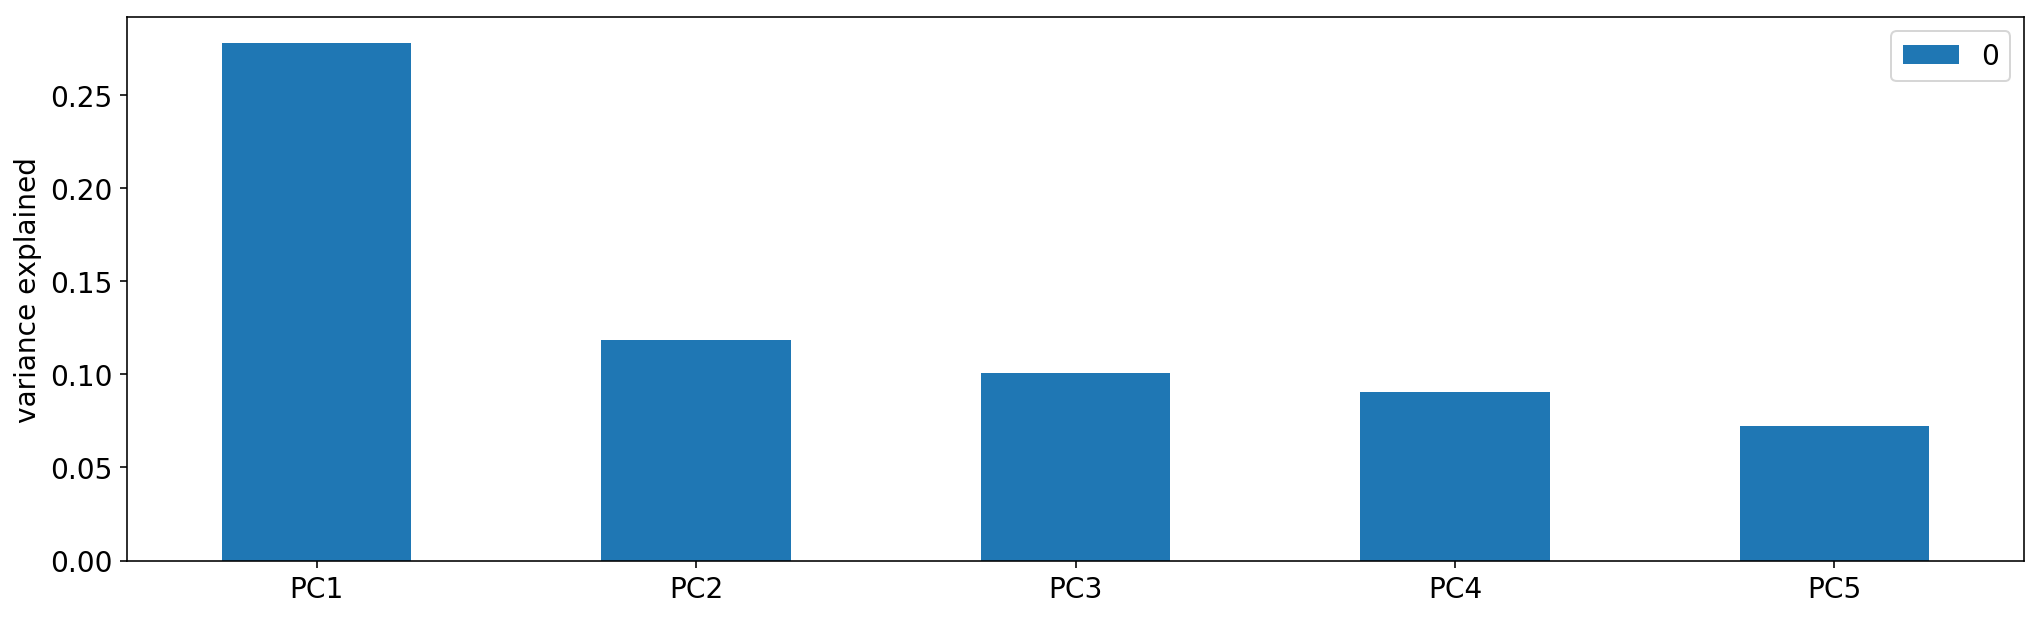

In [24]:
# screeplot for first 5 PCs
var_exp = pd.DataFrame(sp_pca_fit.explained_variance_ratio_,
                       ['PC1', 'PC2','PC3','PC4', 'PC5'])
var_exp.plot.bar(rot=0)
plt.ylabel('variance explained');

#### Visualization

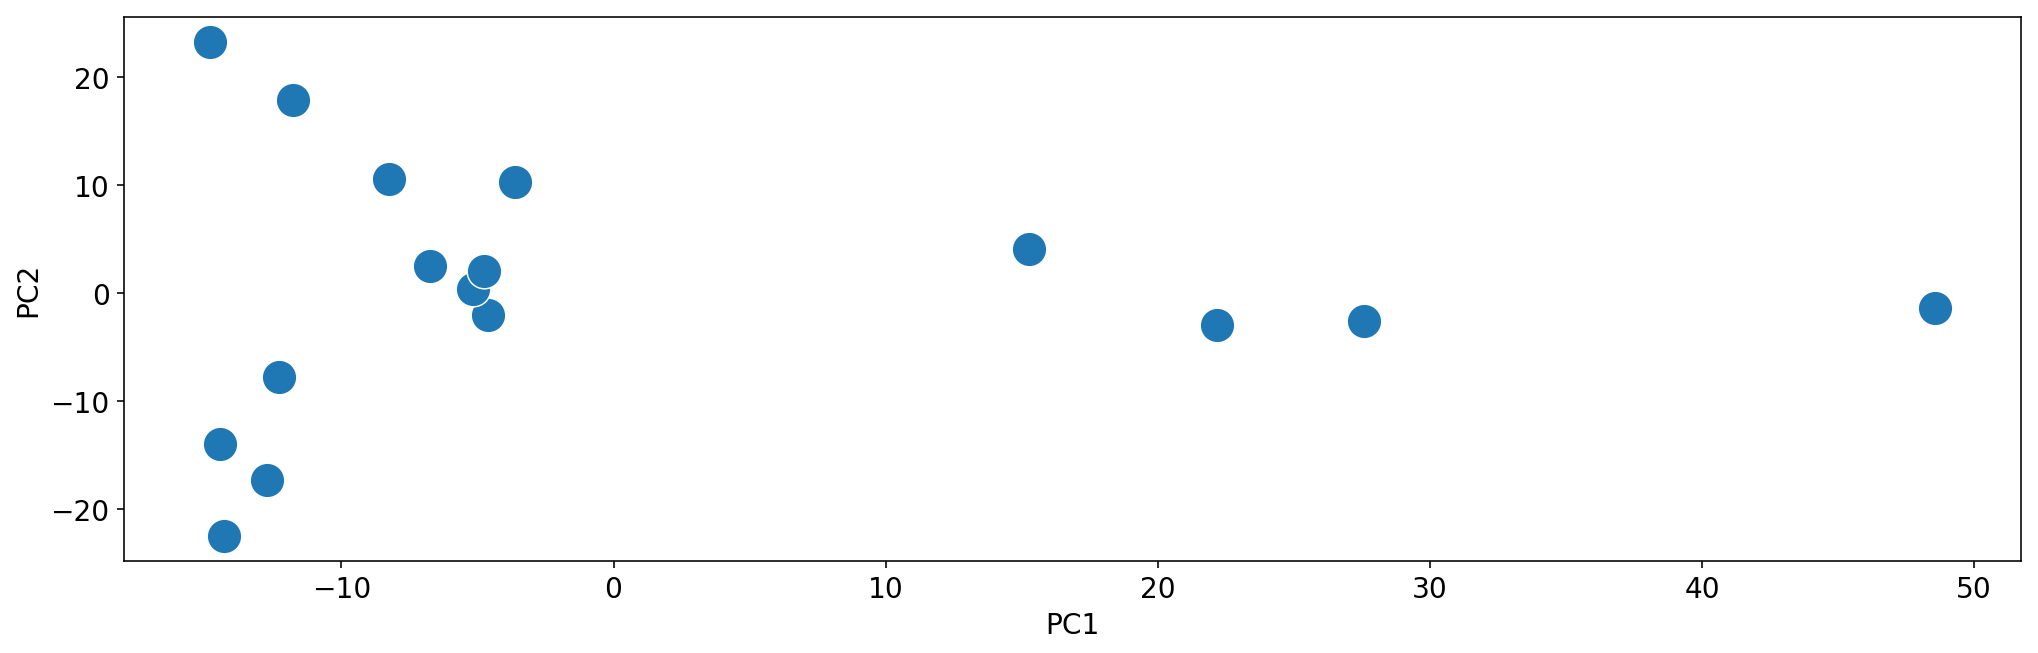

In [25]:
# get dataframe with PCs and label
sp_out = pd.DataFrame(sp_PCs,
                      columns=['PC1','PC2','PC3','PC4','PC5'],
                      index=sp.index)

sns.scatterplot(x = 'PC1', y ='PC2', 
                s = 300, data = sp_out);

In [26]:
sp_out[sp_out['PC1'] > 10]

,PC1,PC2,PC3,PC4,PC5
COP,15.266640,4.046909,-3.964615,-9.280695,2.113920
CVX,27.585849,-2.643153,-5.064388,-18.829437,-6.185482
SLB,48.544395,-1.377688,-0.118776,27.650593,2.131434
XOM,22.157067,-2.995299,-5.012933,-16.805425,-5.957892


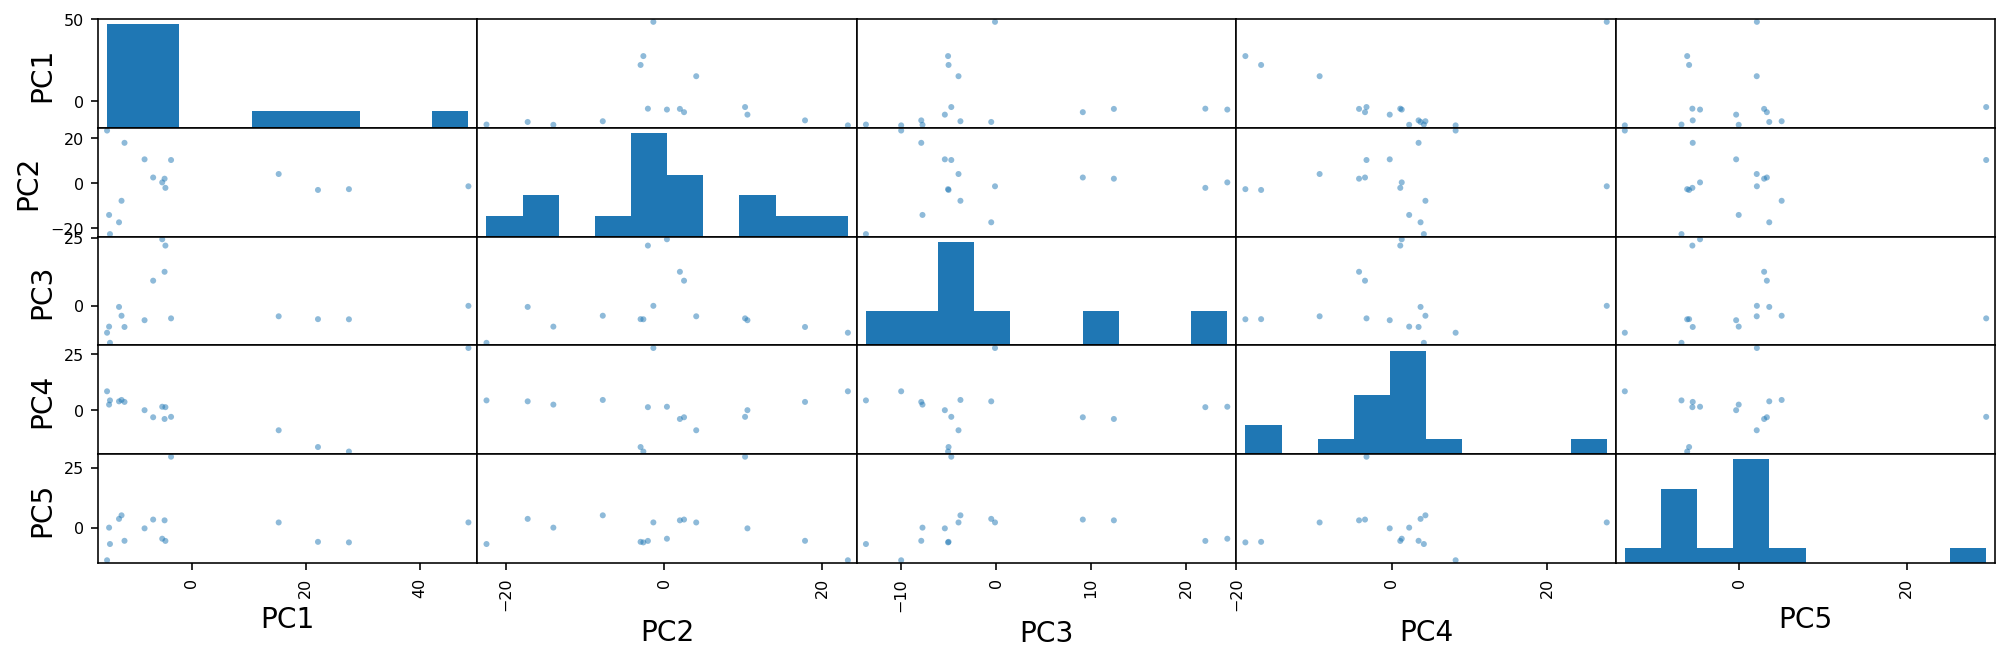

In [33]:
# get dataframe with PCs and label
sp_out = pd.DataFrame(sp_PCs,
                      columns=['PC1','PC2','PC3','PC4','PC5'],
                      index=sp.index)

pd.plotting.scatter_matrix(sp_out);

- COP : ConocoPhillips (crude oil & natural gas)
- CVX : Chevron
- SLB : Schlumberger (technology for oil drilling)
- XOM : Exxon Mobile

### PCA Summary

- helpful to understand _many_ quantitative variables at a time
- PCA helpful for understanding 'global' structure within dataset
    - Identify outliers and groups (means that PCs will be driven by outliers)
- Useful in EDA, modeling, & prediction
- PCA from `sklearn` most straightforward approach to computation